📘 Titanic - Machine Learning from Disaster
Kaggle Submission | Public Score: 0.75119

This notebook walks through an end-to-end machine learning pipeline to predict Titanic passenger survival using structured data. It includes EDA, feature engineering, preprocessing, model training and evaluation, and a final submission.

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
data=pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Exploratory Data Analysis (EDA)


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

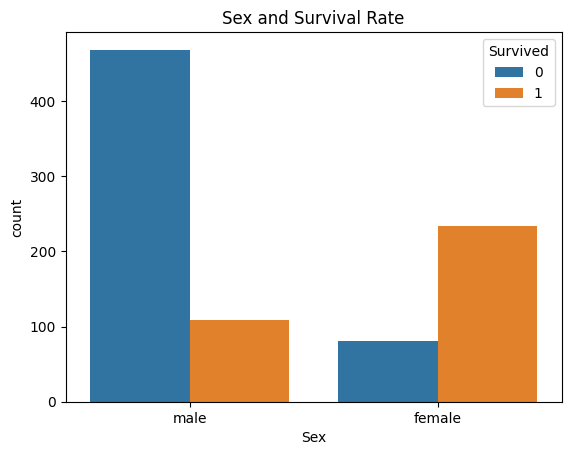

In [31]:
# Visualize survival distribution by gender
sns.countplot(data=data, x='Sex', hue='Survived')
plt.title("Sex and Survival Rate")
plt.show()

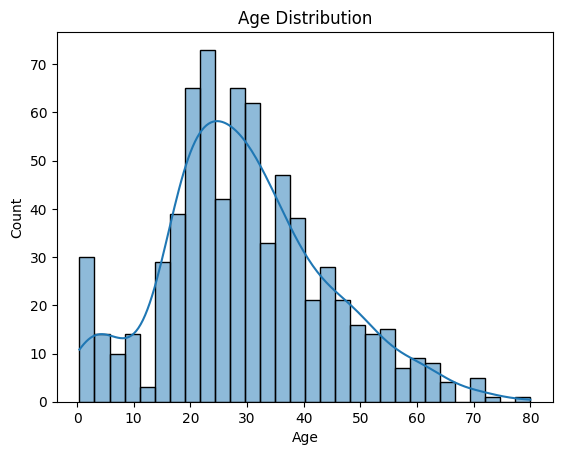

In [32]:
# Age distribution
sns.histplot(data=data, x='Age', kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

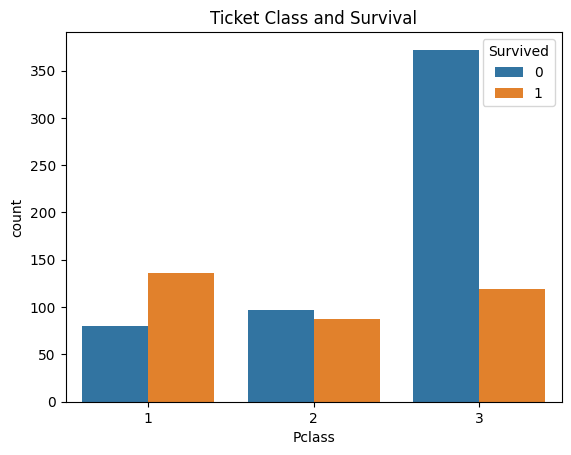

In [33]:
# Pclass vs survival
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.title("Ticket Class and Survival")
plt.show()

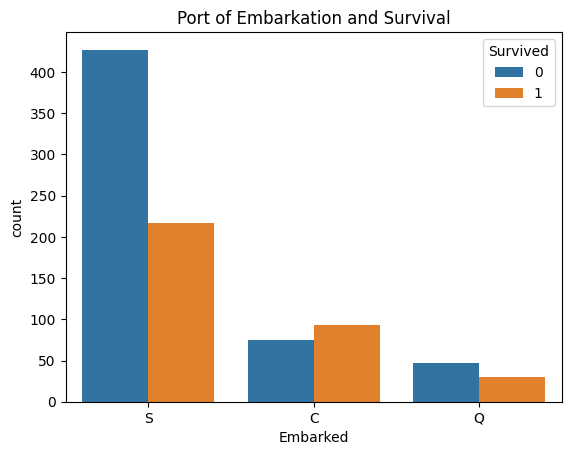

In [34]:
# Embarked vs survival
sns.countplot(data=data, x='Embarked', hue='Survived')
plt.title("Port of Embarkation and Survival")
plt.show()

🛠️ Feature Engineering

In [35]:
# Extract surname and title from Name
data['Surname'] = data['Name'].str.split(',').str[0]
data['Title'] = data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
data.drop(columns=['Name'], inplace=True)

In [36]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr


In [37]:
# Create family-based features
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1

In [38]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title,FamilySize,IsAlone
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,2,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,2,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,1,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,2,0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,1,1


In [39]:
# Group rare titles under 'Rare'
rare_titles = ['Dr', 'Rev', 'Major', 'Col', 'Capt', 'Lady', 'Countess',
               'Don', 'Jonkheer', 'Mme', 'Ms', 'Sir', 'Mlle']
data['Title'] = data['Title'].replace(rare_titles, 'Rare')

In [40]:
data['Title'].value_counts()

Title
Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: count, dtype: int64

🧹 Handling Missing Data

In [41]:

# Fill missing 'Age' values with the median to reduce skew impact 
# and avoid bias from outliers.
data['Age'] = data['Age'].fillna(data['Age'].median())

data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Drop the 'Cabin' column because it contains too many missing values (~77%) 
# and is unlikely to contribute meaningful predictive power in its raw form.
data.drop('Cabin', axis=1, inplace=True)


🧼 Cleaning & Encoding

In [42]:
data.drop(columns=['SibSp', 'Parch'], inplace=True)
data['TicketCount'] = data.groupby('Ticket')['Ticket'].transform('count')
data.drop(columns=['Ticket'], inplace=True)

In [43]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Surname,Title,FamilySize,IsAlone,TicketCount
0,1,0,3,male,22.0,7.2500,S,Braund,Mr,2,0,1
1,2,1,1,female,38.0,71.2833,C,Cumings,Mrs,2,0,1
2,3,1,3,female,26.0,7.9250,S,Heikkinen,Miss,1,1,1
3,4,1,1,female,35.0,53.1000,S,Futrelle,Mrs,2,0,2
4,5,0,3,male,35.0,8.0500,S,Allen,Mr,1,1,1


In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

data = pd.get_dummies(data, columns=['Embarked', 'Title'], drop_first=True)

# Convert boolean to integer
bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)

# Drop PassengerId
data.drop(columns=['PassengerId'], inplace=True)

# Drop Surname
data.drop(columns=['Surname'], inplace=True)


In [45]:
data.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,IsAlone,TicketCount,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,1,22.0,7.2500,2,0,1,0,1,0,1,0,0
1,1,1,0,38.0,71.2833,2,0,1,0,0,0,0,1,0
2,1,3,0,26.0,7.9250,1,1,1,0,1,1,0,0,0
3,1,1,0,35.0,53.1000,2,0,2,0,1,0,0,1,0
4,0,3,1,35.0,8.0500,1,1,1,0,1,0,1,0,0


🧠 Train-Test Split

In [46]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Survived'])
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


🤖 Model Training & Tuning (Grid Search)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

models = {
    'LogReg': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5]
        }
    },
    'GBM': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    }
}


In [48]:
results = []

for name, m in models.items():
    clf = GridSearchCV(m['model'], m['params'], cv=5, scoring='accuracy', n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    results.append({
        'Model': name,
        'Best Params': clf.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
results_df


,Model,Best Params,Accuracy,F1 Score,Precision,Recall
1,RandomForest,"{'max_depth': 5, 'min_samples_split': 2, 'n_es...",0.832402,0.788732,0.823529,0.756757
2,GBM,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.832402,0.791667,0.814286,0.770270
0,LogReg,"{'C': 10, 'solver': 'liblinear'}",0.810056,0.767123,0.777778,0.756757


✨ Preprocess the Test Set for Submission

In [49]:
def preprocess_test_data(test_df):
    df = test_df.copy()

    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
    df['TicketCount'] = df.groupby('Ticket')['Ticket'].transform('count')
    df['Surname'] = df['Name'].str.split(',').str[0]
    df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Capt', 'Lady',
                                       'Countess', 'Don', 'Jonkheer', 'Mme', 'Ms',
                                       'Sir', 'Mlle'], 'Rare')

    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

    le = LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])

    df.drop(columns=['Cabin', 'Ticket', 'Name', 'SibSp', 'Parch', 'Surname'], inplace=True)
    df = pd.get_dummies(df, columns=['Embarked', 'Title'], drop_first=True)

    bool_cols = df.select_dtypes(include='bool').columns
    df[bool_cols] = df[bool_cols].astype(int)

    return df


🛳️ Final Submission (Kaggle Ready)

In [50]:
test = pd.read_csv("test.csv")
test_processed = preprocess_test_data(test)

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X, y)

predictions = model.predict(test_processed[X.columns])
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions
})
submission.to_csv('submission.csv', index=False)

🏁 Final Public Score: 0.75119